## Estadistica Aplicada 

Sesion 14 - 17 octubre 

Ana Sofia Saucedo Garcia
1946646

Grupo 42

In [1]:
# Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## especializadas 

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## modelo ARIMA 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict


##
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12


In [5]:
# Paso extra para importar el archivo de internet 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
# datos 

igae_deses= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

IGAE (pib mensual) desestacionalizado
* ARIMA = serie no tiene componente estacional
* SARIMA = serie con componente estacional 


In [16]:
# 1 Formato fecha
# 2 Fecha sea el index
# 3 Asignar una frecuencia

igae_deses['meses']=pd.to_datetime(igae_deses['meses'],format='%Y/%m')

In [17]:
igae_deses.head()

,meses,IGAE_DESES
0,1993-01-01,56.282290
1,1993-02-01,57.708594
2,1993-03-01,57.825254
3,1993-04-01,57.179522
4,1993-05-01,57.895451


In [18]:
igae_deses=igae_deses.set_index('meses')

In [19]:
igae_deses.head(1)

,IGAE_DESES
meses,
1993-01-01,56.28229


In [21]:
# asignar frecuencia 

igae_deses=igae_deses.asfreq('MS')

In [22]:
igae_deses.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

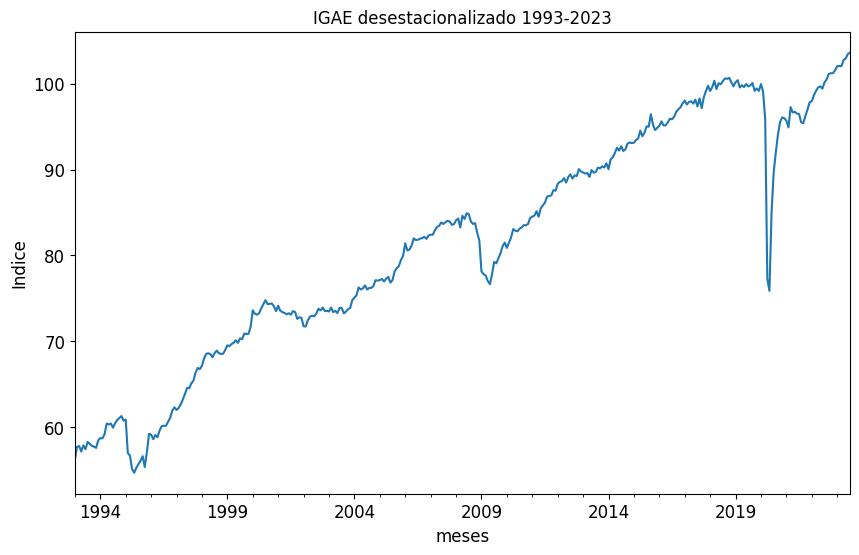

In [23]:
# Graficar la serie de tiempo 

igae_deses['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('Indice')
plt.show()

IGAE se comporta como una caminata aleatoria con deriva , por tanto sospechamos que es un proceso **no estacionario**

In [27]:
## Prueba de dickey-fuller aumentada 
## Ho: Serie no estacionaria 
## Ha: Serie estacionaria 

## pvalue < alpha Rechazamos H0

prueba_DFA= adfuller(igae_deses['IGAE_DESES'])

## el pvalue de esta prueba esta en la posicion 1 

pvalue=prueba_DFA[1]
pvalue.round(2)

0.74

El pvalue es de 0.74 , por tanto No rechazamos $H_0$ , El IGAE('IGAE_DESES') es una serie No estacionaria

Para hacer la serie estacionaria , necesitamos calcular las primeras diferencias del IGAE

$$ \Delta_t = Y_t - Y_{t-1}$$

In [28]:
## Primeras diferencias del Igae

igae_deses['igae_diff']=igae_deses['IGAE_DESES'].diff()

In [29]:
igae_deses

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929
...,...,...
2023-03-01,102.032776,-0.011138
2023-04-01,102.735045,0.702268
2023-05-01,102.924688,0.189644


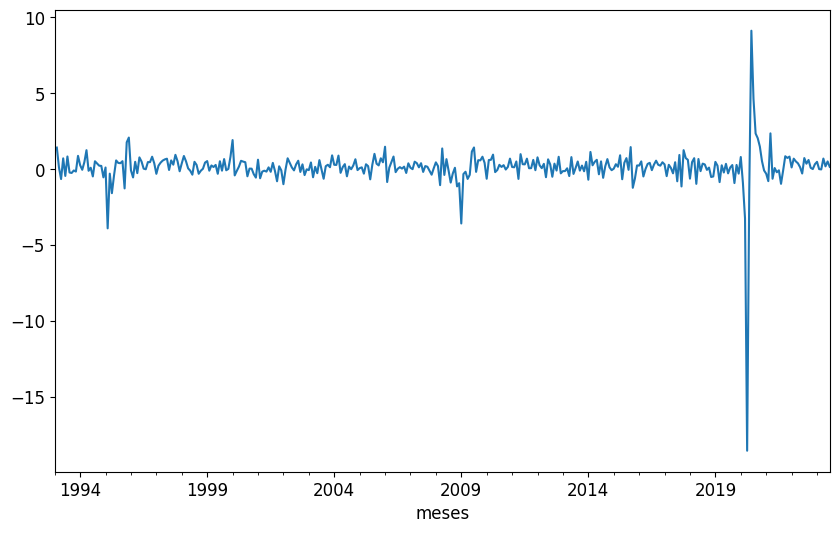

In [30]:
igae_deses['igae_diff'].plot();

In [31]:
## Prueba de dickey-fuller aumentada para 
## primeras diferencia del igae

prueba_DFA1=adfuller(igae_deses['igae_diff'].dropna())
pvalue1= prueba_DFA1[1]
pvalue1.round(2)

0.0

El pvalue es 0.0 , entonces rechazamos $H_0$ , las primeras diferencias del igae('igae_diff') son una serie estacionaria
* IGAE = Integrado I(1)
* 1ras igae= Integrado I(0)


Ya sabemos que las primeras diferencias son un proceso estacionario , pero no sabemos que tipo de proceso estacionario es

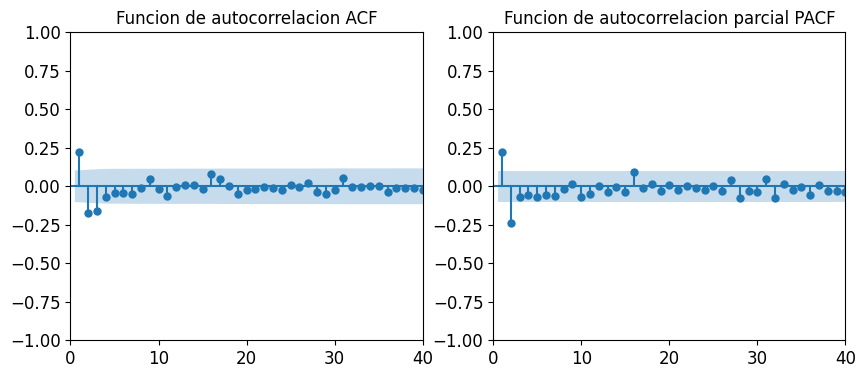

In [35]:
## graficas de autocorrelacion 

ig,ax = plt.subplots(1,2,figsize=(10,4))

## primer subgrafica

plot_acf(igae_deses['igae_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='Funcion de autocorrelacion ACF')
ax[0].set_ylim(-1,1)
ax[0].set_xlim(0,40)

## segunda subgrafica 
plot_pacf(igae_deses['igae_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='Funcion de autocorrelacion parcial PACF')
ax[1].set_ylim (-1,1)
ax[1].set_xlim(0,40)

plt.show()


In [36]:
# Suponer igae_diff AR(1)= ARMA(1,0)=ARIMA(1,0,0)
## estimar ARIMA(MCO)

modelo_prueba = ARIMA(igae_deses['igae_diff'],order=(1,0,0))
resultadop= modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  367
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Tue, 17 Oct 2023   AIC                           1210.530
Time:                        15:18:04   BIC                           1222.246
Sample:                    01-01-1993   HQIC                          1215.185
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

En minimos cuadrados $H_0$ es que el coeficiente es 0,
Entonces No rechazamos $H_0$ por que pvalue es 0.271

El modelo estimado por MCO es 

$$ Y_t = 0.22Y_{t-1}+ \varepsilon_t $$

In [37]:
modelo_prueba = ARIMA(igae_deses['igae_diff'],order=(2,0,0))
resultadop= modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  367
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -591.689
Date:                Tue, 17 Oct 2023   AIC                           1191.379
Time:                        15:44:41   BIC                           1207.000
Sample:                    01-01-1993   HQIC                          1197.585
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1292      0.110      1.179      0.238      -0.085       0.344
ar.L1          0.2747      0.027     10.270      0.000       0.222       0.327
ar.L2         -0.2367      0.017    -14.275      0.0

In [40]:
ic= {}

for ar in range(7):
    for ma in range(7):
        print(f"AR:{ar},MA:{ma}")
        modelo= ARIMA(igae_deses['igae_diff'].dropna(),order=(ar,0,ma))
        resultado=modelo.fit()
        ic[(ar,ma)]= [resultado.aic,resultado.bic]
ic= pd.DataFrame(ic,index=['AIC','BIC']).T
ic.index=ic.index.set_names(['AR','MA'])

AR:0,MA:0
AR:0,MA:1
AR:0,MA:2
AR:0,MA:3
AR:0,MA:4
AR:0,MA:5
AR:0,MA:6
AR:1,MA:0
AR:1,MA:1
AR:1,MA:2
AR:1,MA:3
AR:1,MA:4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:1,MA:5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:1,MA:6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2,MA:0
AR:2,MA:1
AR:2,MA:2
AR:2,MA:3
AR:2,MA:4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2,MA:5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:2,MA:6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:0
AR:3,MA:1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:3,MA:6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:0
AR:4,MA:1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:4,MA:2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:4
AR:4,MA:5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:4,MA:6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5,MA:0
AR:5,MA:1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5,MA:2
AR:5,MA:3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5,MA:4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:5,MA:5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:5,MA:6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:0
AR:6,MA:1


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:2


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:6,MA:3


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR:6,MA:4


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:5


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR:6,MA:6


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
ic

AIC          BIC
AR MA                          
0  0   1227.009237  1234.814504
   1   1200.924033  1212.631933
   2   1198.260034  1213.870567
   3   1189.688976  1209.202143
   4   1189.375837  1212.791637
   5   1190.171591  1217.490024
   6   1191.716873  1222.937940
1  0   1210.529688  1222.237588
   1   1200.876150  1216.486683
   2   1186.316694  1205.829861
   3   1187.415090  1210.830890
   4   1184.843160  1212.161593
   5   1186.229362  1217.450429
   6   1187.912552  1223.036252
2  0   1191.378555  1206.989088
   1   1188.692731  1208.205898
   2   1187.655051  1211.070851
   3   1189.183880  1216.502314
   4   1186.638622  1217.859688
   5   1188.781269  1223.904969
   6   1189.991402  1229.017735
3  0   1191.708073  1211.221239
   1   1183.372566  1206.788366
   2   1184.880297  1212.198730
   3   1186.730845  1217.951912
   4   1192.471324  1227.595024
   5   1190.724978  1229.751311
   6   1188.305905  1231.234872
4  0   1192.619318  1216.035118
   1   1185.021103  1212.339536
   2   1187.146824  1218.367891
   3   1188.608436  1223.732136
   4   1195.645805  1234.672139
   5   1195.132972  1238.061938
   6   1191.704263  1238.535863
5  0   1192.862955  1220.181389
   1   1186.855985  1218.077052
   2   1189.014715  1224.138415
   3   1190.574029  1229.600362
   4   1191.421166  1234.350133
   5   1194.566204  1241.397804
   6   1192.105717  1242.839950
6  0   1193.741006  1224.962073
   1   1188.297784  1223.421484
   2   1190.722022  1229.748356
   3   1192.260713  1235.189679
   4   1193.305266  1240.136866
   5   1199.988883  1250.723116
   6   1194.505973  1249.142839

In [42]:
ic.sort_values('AIC').head(1)

,,AIC,BIC
AR,MA,,
3,1,1183.372566,1206.788366


Las primeras diferencias del IGAE son un ARMA(3,1)
* Primeras diferencias ARIMA(3,0,1)

* IGAE ARIMA(3,1,1)    IGAE ARIMA(p,i,q)


In [43]:
## Modelo ARIMA para el IGAE 
arima_model= ARIMA(igae_deses['IGAE_DESES'],order=(3,1,1))
results= arima_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             IGAE_DESES   No. Observations:                  367
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -591.604
Date:                Tue, 17 Oct 2023   AIC                           1193.208
Time:                        16:03:12   BIC                           1212.721
Sample:                    01-01-1993   HQIC                          1200.962
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0175      0.232      4.384      0.000       0.563       1.472
ar.L2         -0.4222      0.072     -5.876      0.000      -0.563      -0.281
ar.L3          0.1048      0.089      1.176      0.2

In [46]:
## Pronosticar la serie original

igae_deses['Modelo_arima']=results.predict()
igae_deses['Modelo_arima'][0]= igae_deses['IGAE_DESES'][0]

In [47]:
igae_deses.head()

,IGAE_DESES,igae_diff,Modelo_arima
meses,,,
1993-01-01,56.282290,NaN,56.282290
1993-02-01,57.708594,1.426305,56.282311
1993-03-01,57.825254,0.116660,58.035802
1993-04-01,57.179522,-0.645732,57.530971
1993-05-01,57.895451,0.715929,56.886611


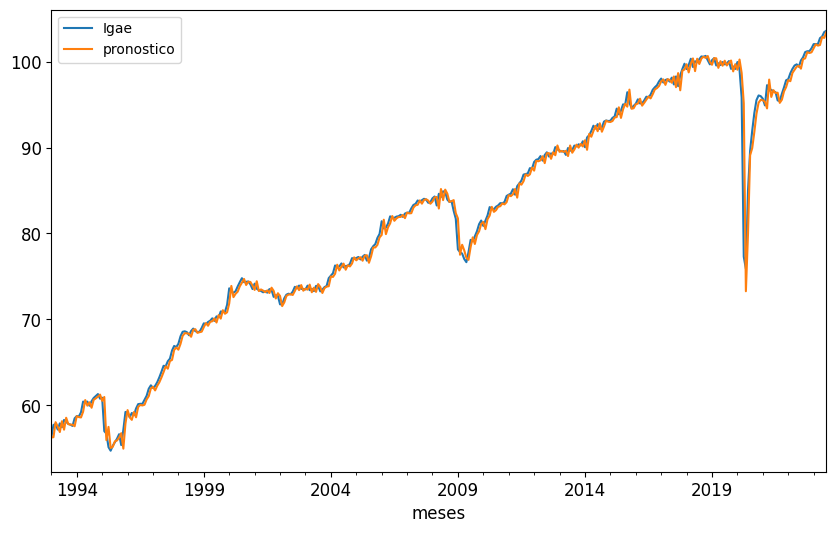

In [48]:
igae_deses['IGAE_DESES'].plot(label='Igae')
igae_deses['Modelo_arima'].plot(label='pronostico')
plt.legend();

(540.0, 645.0)

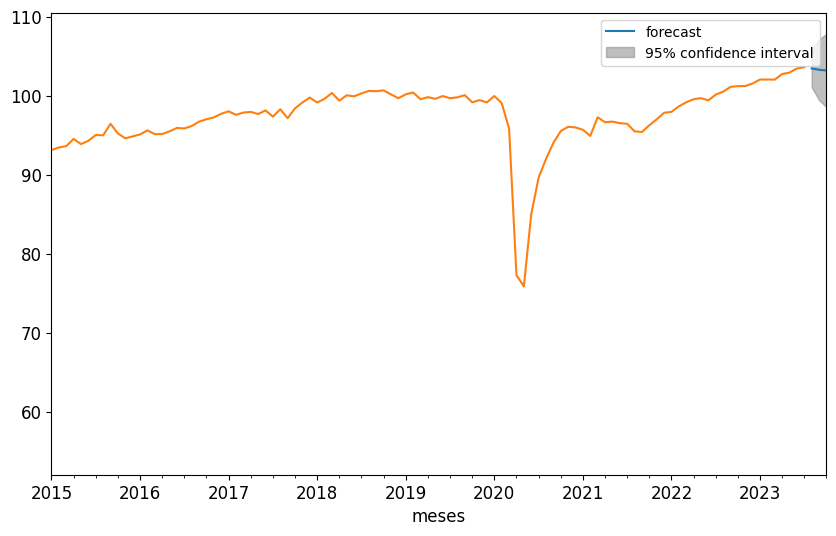

In [59]:
#grafica del pronostico 

plot_predict(results,start='2023-08-01',end='2023-10-01	')
igae_deses['IGAE_DESES'].plot()
plt.xlim('2015-01-01','2023-10-01')

In [50]:
# Observamos que solo tebemos hasta la fecha que se muestra (2023-07-01)
igae_deses.tail(1)

,IGAE_DESES,igae_diff,Modelo_arima
meses,,,
2023-07-01,103.596612,0.158524,103.442199


In [62]:
results.predict(start='2023-08-01',end='2023-10-01')

2023-08-01    103.443848
2023-09-01    103.275282
2023-10-01    103.184865
Freq: MS, Name: predicted_mean, dtype: float64

El pronostico de los modelos ARIMA es de corto plazo, conforme se pronostica mas en el futuro el intervalo de confianza se hace mas grande , tambien el pronostico converge a una constante lo que significa que tiene muy poca capacidad de pronosticar a mediano y largo plazo , en general se plantea que si es un ARIMA(3,1,1) pronostica bastante bien 3 periodos futuros , si es un ARIMA (2,1,4), pronostica bien 4 periodos futuros